# Summer Olympics Data Analysis

## 1. In how many cities Summer Olympics is held so far?

In [4]:
import pandas as pd
import numpy as np
df = pd.read_csv("summer.csv")
cities = df["City"].unique() #unique cities in an array
no_of_cities = len(cities)
print("In {} cities summmer olympics is held so far".format(no_of_cities))

In 22 cities summmer olympics is held so far


## 2. Which sport is having most number of Gold Medals so far? (Top 5)

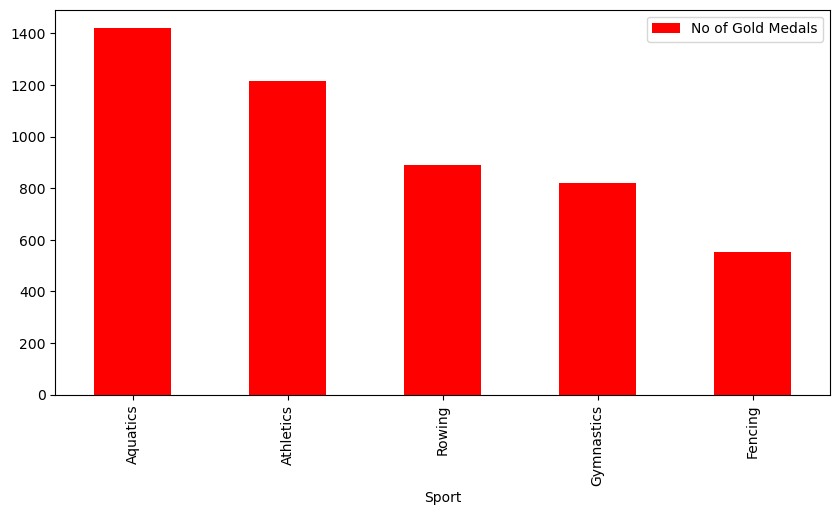

In [20]:
import pandas as pd
import numpy as np
df = pd.read_csv("summer.csv")
data = []
for sport in df["Sport"].unique() :
    df = df[df["Sport"] == sport]
    data.append([sport,len(df[df["Medal"] == "Gold"])]) 
    df = pd.read_csv("summer.csv")
data = pd.DataFrame(data , columns = ["Sport" , "No of Gold Medals"])
data = data.sort_values(by = "No of Gold Medals",ascending = False).head() 
data = data.plot(x = "Sport",y = "No of Gold Medals",kind = "bar",figsize = (10,5),color = "red") 

## 3. Which sport is having most number of medals so far? (Top 5)

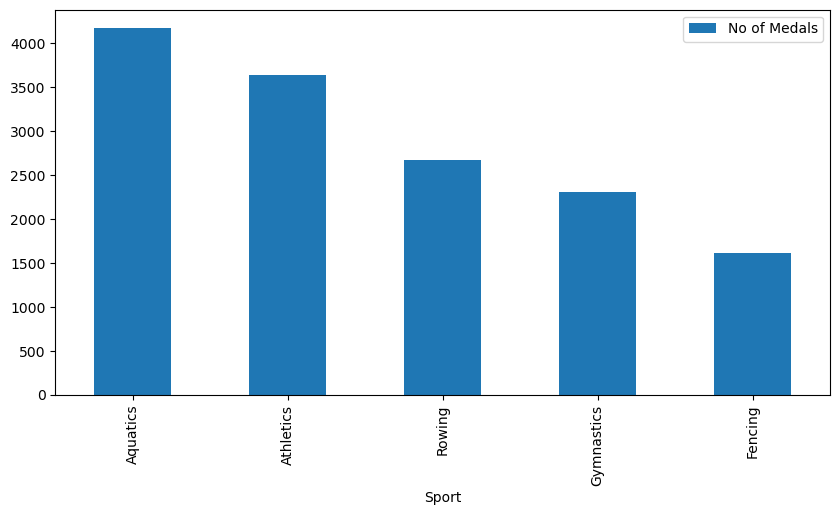

In [6]:
import pandas as pd
import numpy as np
df = pd.read_csv("summer.csv")
data = []
for sport in df["Sport"].unique() :
    df = df[df["Sport"] == sport]
    data.append([sport, len(df[df["Sport"] == sport])])
    df = pd.read_csv("summer.csv")
data = pd.DataFrame(data , columns = ["Sport" , "No of Medals"]) 
data = data.sort_values(by = "No of Medals",ascending = False).head()
data = data.plot(x = "Sport",y = "No of Medals",kind = "bar",figsize = (10,5))

## 4. Which event is most popular in terms on number of players? (Top 5)


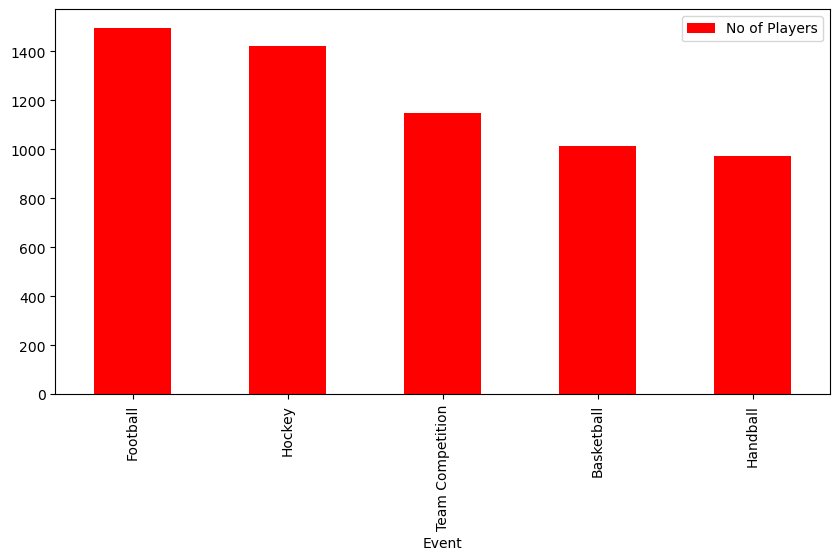

In [19]:
import pandas as pd
import numpy as np
df = pd.read_csv("summer.csv")
data = []
for event in df["Event"].unique() :
    data.append([event , len(df[df["Event"] == event])])
data = pd.DataFrame(data , columns = ["Event" , "No of Players"]).sort_values(by = "No of Players" , ascending = False).head()
data = data.plot(x = "Event" , y = "No of Players" , color = "red" , kind = "bar" , figsize = (10,5))

## 5. In which year India won first Gold Medal in Summer Olympics?

In [14]:
import pandas as pd
import numpy as np
df = pd.read_csv("summer.csv")
df = df[df["Country"] == "IND"].sort_values(by = "Year")
df = df[df["Medal"] == "Gold"].head(1)
year = int(df["Year"])
print("In {} India won first gold medal in summer olympics".format(year))

In 1928 India won first gold medal in summer olympics


## 6. Which sport is having most female Gold Medalists? (Top 5)

<AxesSubplot:xlabel='Sport'>

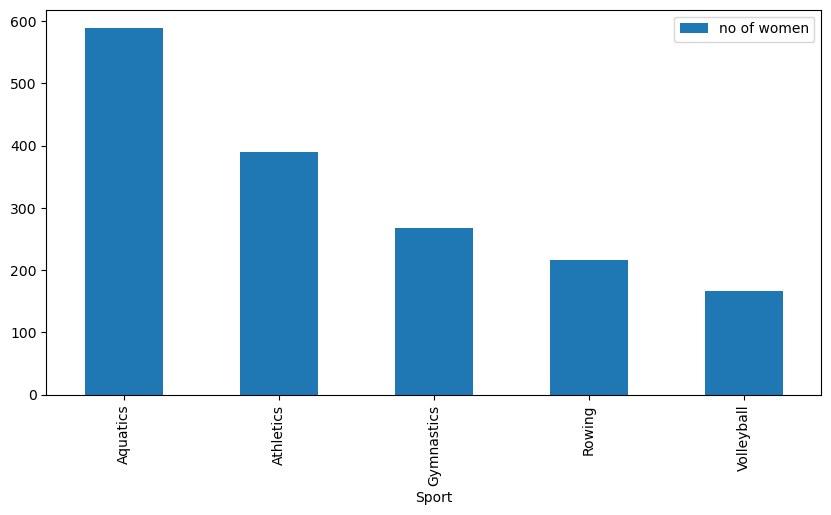

In [15]:
import pandas as pd
import numpy as np
df = pd.read_csv("summer.csv")
data = []
for sport in df["Sport"].unique() :
    player_df = df[df["Sport"] == sport]
    female_df = player_df[player_df["Gender"] == "Women"]
    gold_medal_df = female_df[female_df["Medal"] == "Gold"]
    data.append([sport,len(gold_medal_df)])
data = pd.DataFrame(data , columns = ["Sport" , "no of women"]).sort_values(by = "no of women" , ascending = False).head()
data.plot(x = "Sport",y = "no of women",kind = "bar",figsize = (10,5))

## 7. Which sport is having most female Gold Medalists? (Top 5)

<AxesSubplot:xlabel='Sport'>

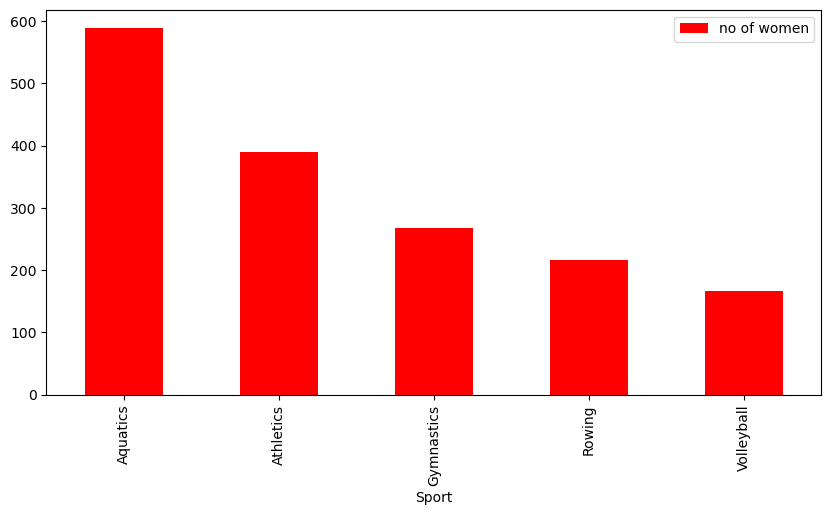

In [25]:
import pandas as pd
import numpy as np
df = pd.read_csv("summer.csv")
data = []
for sport in df["Sport"].unique() :
    player_df = df[df["Sport"] == sport]
    female_df = player_df[player_df["Gender"] == "Women"]
    gold_medal_df = female_df[female_df["Medal"] == "Gold"]
    data.append([sport,len(gold_medal_df)])
data = pd.DataFrame(data , columns = ["Sport" , "no of women"]).sort_values(by = "no of women" , ascending = False).head()
data.plot(x = "Sport",y = "no of women",color = "red", kind = "bar",figsize = (10,5))